In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv(r'E:\Info_Srping\FWI_Prediction\Data\processed\\test_train_split_after_outlier\train.csv')
data

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,snow_on_ground,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,21.7,3.3,28.0,25.9,360,1020.40,16.1,0.00,8,0.0,...,52.9,426.5,80.8,26.9,53.8,31.5,United States,37.262524,-98.546196,472.1
1,0.1,-0.1,98.0,6.2,104,1015.97,25.3,0.00,4,0.0,...,37.6,646.4,65.7,1.5,5.6,0.6,Canada,49.550000,-111.050000,845.0
2,1.7,-8.3,47.8,24.1,330,1029.50,16.1,1.54,0,0.0,...,4.5,318.3,8.8,2.3,2.0,0.1,United States,39.771942,-94.909706,251.9
3,31.0,2.0,15.6,14.8,320,1019.60,16.1,0.00,18,0.0,...,146.5,688.1,191.2,21.3,62.2,40.7,United States,43.564360,-116.222860,875.3
4,24.0,7.4,36.0,5.6,271,1021.50,14.5,1.30,0,0.0,...,48.5,289.5,68.3,3.4,11.7,2.1,Canada,53.030000,-122.510000,545.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759584,25.4,16.0,55.0,10.6,231,1010.67,24.7,2.51,0,0.0,...,10.1,207.8,18.0,1.6,2.2,0.1,Canada,45.840000,-75.650000,194.6
759585,19.4,9.4,52.6,3.7,110,1012.30,42.2,0.70,0,0.0,...,12.5,45.2,14.8,2.2,2.8,0.2,Canada,47.320000,-71.150000,672.8
759586,16.4,7.5,55.0,14.0,223,1003.80,25.0,0.00,4,0.0,...,32.9,116.6,38.5,6.4,14.0,2.9,Canada,64.050000,-139.133330,370.0
759587,21.4,7.9,43.1,14.2,318,1010.63,21.4,0.40,0,0.0,...,85.1,444.3,115.1,9.8,33.1,13.3,Canada,53.340000,-110.880000,623.0


In [3]:
train_data = data.iloc[:20000]       
train_data

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,snow_on_ground,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,21.7,3.3,28.0,25.9,360,1020.40,16.1,0.00,8,0.0,...,52.9,426.5,80.8,26.9,53.8,31.5,United States,37.262524,-98.546196,472.1
1,0.1,-0.1,98.0,6.2,104,1015.97,25.3,0.00,4,0.0,...,37.6,646.4,65.7,1.5,5.6,0.6,Canada,49.550000,-111.050000,845.0
2,1.7,-8.3,47.8,24.1,330,1029.50,16.1,1.54,0,0.0,...,4.5,318.3,8.8,2.3,2.0,0.1,United States,39.771942,-94.909706,251.9
3,31.0,2.0,15.6,14.8,320,1019.60,16.1,0.00,18,0.0,...,146.5,688.1,191.2,21.3,62.2,40.7,United States,43.564360,-116.222860,875.3
4,24.0,7.4,36.0,5.6,271,1021.50,14.5,1.30,0,0.0,...,48.5,289.5,68.3,3.4,11.7,2.1,Canada,53.030000,-122.510000,545.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,23.6,10.0,40.0,9.0,135,1020.25,3.8,1.30,0,0.0,...,34.6,296.4,53.5,4.0,11.6,2.1,United Kingdom,54.367000,-1.617000,53.0
19996,23.0,20.8,87.0,16.1,184,1013.10,18.1,4.50,0,0.0,...,22.3,212.6,35.3,0.6,0.8,0.0,Canada,46.460000,-61.990000,7.7
19997,13.0,-2.0,35.0,14.8,280,1017.70,16.1,0.00,4,0.0,...,13.4,118.6,20.9,6.1,9.7,1.5,United States,36.894608,-76.201230,8.0
19998,12.8,3.6,53.0,10.2,218,1023.70,17.3,9.80,0,0.0,...,4.5,141.5,8.4,0.2,0.1,0.0,Canada,46.710000,-79.100000,181.4


In [4]:
train_data = train_data.drop(['wind_direction','snow_on_ground','daily_severity_rating','latitude','longitude', 'elevation','visibility'], axis = 1)
train_data

,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,country
0,21.7,3.3,28.0,25.9,1020.40,0.00,8,93.7,52.9,426.5,80.8,26.9,53.8,United States
1,0.1,-0.1,98.0,6.2,1015.97,0.00,4,79.9,37.6,646.4,65.7,1.5,5.6,Canada
2,1.7,-8.3,47.8,24.1,1029.50,1.54,0,72.8,4.5,318.3,8.8,2.3,2.0,United States
3,31.0,2.0,15.6,14.8,1019.60,0.00,18,96.1,146.5,688.1,191.2,21.3,62.2,United States
4,24.0,7.4,36.0,5.6,1021.50,1.30,0,86.4,48.5,289.5,68.3,3.4,11.7,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,23.6,10.0,40.0,9.0,1020.25,1.30,0,86.4,34.6,296.4,53.5,4.0,11.6,United Kingdom
19996,23.0,20.8,87.0,16.1,1013.10,4.50,0,54.9,22.3,212.6,35.3,0.6,0.8,Canada
19997,13.0,-2.0,35.0,14.8,1017.70,0.00,4,87.3,13.4,118.6,20.9,6.1,9.7,United States
19998,12.8,3.6,53.0,10.2,1023.70,9.80,0,45.7,4.5,141.5,8.4,0.2,0.1,Canada


In [5]:
# Load saved PowerTransformer dictionary
with open(r'E:\Info_Srping\FWI_Prediction\models\Pkl_files_after_outlier_remover\power_transformers.pkl', 'rb') as f:
    power_transformers = pickle.load(f)

# Load saved StandardScaler
with open(r'E:\Info_Srping\FWI_Prediction\models\Pkl_files_after_outlier_remover\standard_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Load saved OneHotEncoding
with open(r'E:\Info_Srping\FWI_Prediction\models\Pkl_files_after_outlier_remover\one_hot_encoder.pkl', 'rb') as f:
    ohe = pickle.load(f)


In [6]:
col = ['fine_fuel_moisture_code','duff_moisture_code', 'drought_code','build_up_index', 'initial_spread_index','fire_weather_index','wind_speed']
for col, pt in power_transformers.items():
    # Transform test column using fitted transformer
    transformed = pt.transform(train_data[col].values.reshape(-1, 1))
    train_data[col + '_transformed'] = transformed.flatten()


In [7]:
numeric_cols = train_data.select_dtypes(include=['float64', 'int']).columns
train_data[numeric_cols] = scaler.transform(train_data[numeric_cols])

In [8]:
train_data

,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,0.642664,-0.636352,-1.483321,1.266833,0.846691,-0.368303,1.445606,0.991471,1.046242,0.961702,...,3.667312,3.308823,United States,1.360353,1.191756,1.011975,1.246469,2.071962,1.832017,1.227953
1,-2.306720,-1.127052,1.948817,-1.030822,0.183518,-0.368303,0.424063,0.284805,0.478038,2.080661,...,-0.584756,-0.364744,Canada,0.109223,0.836119,1.655168,1.011166,-0.533502,0.093711,-1.145272
2,-2.088247,-2.310505,-0.512516,1.056895,2.208964,-0.129282,-0.597480,-0.078769,-0.751216,0.411128,...,-0.450833,-0.639119,United States,-0.393264,-0.964458,0.618773,-0.807440,-0.207574,-0.552952,1.081028
3,1.912537,-0.823972,-2.091300,-0.027785,0.726931,-0.368303,3.999464,1.114369,4.522319,2.292850,...,2.729848,3.949030,United States,1.618197,2.359785,1.761348,2.336418,1.850486,1.949264,0.166866
4,0.956719,-0.044625,-1.091077,-1.100801,1.011361,-0.166532,-0.597480,0.617655,0.882837,0.264580,...,-0.266688,0.100168,Canada,0.651045,1.099615,0.500810,1.054569,0.122646,0.630892,-1.274088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.902100,0.330616,-0.894954,-0.704252,0.824236,-0.166532,-0.597480,0.617655,0.366625,0.299690,...,-0.166246,0.092546,United Kingdom,0.651045,0.752180,0.529695,0.787036,0.266974,0.624402,-0.630600
19996,0.820173,1.889310,1.409481,0.123837,-0.246122,0.330136,-0.597480,-0.995386,-0.090167,-0.126725,...,-0.735420,-0.730577,Canada,-1.297142,0.326188,0.146128,0.361305,-1.072740,-0.971659,0.315018
19997,-0.545282,-1.401266,-1.140107,-0.027785,0.442500,-0.368303,0.424063,0.663742,-0.420691,-0.605042,...,0.185303,-0.052263,United States,0.732577,-0.130493,-0.416285,-0.124360,0.655429,0.490225,0.166866
19998,-0.572592,-0.593055,-0.257557,-0.564293,1.340702,1.152741,-0.597480,-1.466497,-0.751216,-0.488516,...,-0.802382,-0.783927,Canada,-1.590669,-0.964458,-0.259739,-0.840084,-1.430621,-1.375139,-0.442142


In [9]:
train_data = train_data[['temperature', 'dew_point_temperature', 'relative_humidity',
        'atmospheric_pressure', 'precipitation', 'rain_days',
       'country', 'fine_fuel_moisture_code_transformed',
       'duff_moisture_code_transformed', 'drought_code_transformed',
       'build_up_index_transformed', 'initial_spread_index_transformed',
       'fire_weather_index_transformed', 'wind_speed_transformed']]

In [10]:
train_data['FFMC__TEMP'] = train_data['temperature'] * train_data['fine_fuel_moisture_code_transformed']
train_data['FFMC_RH'] = train_data['relative_humidity'] * train_data['fine_fuel_moisture_code_transformed']
train_data['RH_TEMP'] = train_data['temperature'] * train_data['relative_humidity']
train_data['RD_FFMC'] =  train_data['fine_fuel_moisture_code_transformed'] * train_data['rain_days']
train_data['DC_RD'] =  train_data['drought_code_transformed'] * train_data['rain_days']
train_data['WS_TENP'] =  train_data['wind_speed_transformed'] * train_data['fine_fuel_moisture_code_transformed']
train_data['IST_WS'] =  train_data['wind_speed_transformed'] * train_data['initial_spread_index_transformed']
train_data['ISI_FFMC'] =  train_data['initial_spread_index_transformed'] * train_data['fine_fuel_moisture_code_transformed']
train_data['ISI_RH'] =  train_data['initial_spread_index_transformed'] * train_data['relative_humidity']
train_data['DMC_TEMP'] =  train_data['duff_moisture_code_transformed'] * train_data['temperature']
train_data['DMC_RD'] =  train_data['duff_moisture_code_transformed'] * train_data['rain_days']
train_data['RD_TEMP'] =  train_data['rain_days'] * train_data['temperature']
train_data['DMC_DC'] =  train_data['drought_code_transformed'] * train_data['duff_moisture_code_transformed']
train_data['BUI_DC'] =  train_data['drought_code_transformed'] * train_data['build_up_index_transformed']
train_data['BUI_DMC'] =  train_data['duff_moisture_code_transformed'] * train_data['build_up_index_transformed']

C:\Users\DELL\AppData\Local\Temp\ipykernel_16464\1968526459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['FFMC__TEMP'] = train_data['temperature'] * train_data['fine_fuel_moisture_code_transformed']
C:\Users\DELL\AppData\Local\Temp\ipykernel_16464\1968526459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['FFMC_RH'] = train_data['relative_humidity'] * train_data['fine_fuel_moisture_code_transformed']
C:\Users\DELL\AppData\Local\Temp\ipykernel_16464\1968526459.py:3: SettingWi

In [11]:
train_data

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,...,WS_TENP,IST_WS,ISI_FFMC,ISI_RH,DMC_TEMP,DMC_RD,RD_TEMP,DMC_DC,BUI_DC,BUI_DMC
0,0.642664,-0.636352,-1.483321,0.846691,-0.368303,1.445606,United States,1.360353,1.191756,1.011975,...,1.670449,2.544272,2.818599,-3.073384,0.765899,1.722810,0.929039,1.206027,1.261395,1.485487
1,-2.306720,-1.127052,1.948817,0.183518,-0.368303,0.424063,Canada,0.109223,0.836119,1.655168,...,-0.125090,0.611004,-0.058271,-1.039697,-1.928692,0.354567,-0.978194,1.383918,1.673651,0.845455
2,-2.088247,-2.310505,-0.512516,2.208964,-0.129282,-0.597480,United States,-0.393264,-0.964458,0.618773,...,-0.425130,-0.224394,0.081632,0.106385,2.014027,0.576245,1.247687,-0.596781,-0.499622,0.778742
3,1.912537,-0.823972,-2.091300,0.726931,-0.368303,3.999464,United States,1.618197,2.359785,1.761348,...,0.270021,0.308783,2.994451,-3.869921,4.513176,9.437875,7.649125,4.156402,4.115246,5.513444
4,0.956719,-0.044625,-1.091077,1.011361,-0.166532,-0.597480,Canada,0.651045,1.099615,0.500810,...,-0.829488,-0.156261,0.079848,-0.133816,1.052022,-0.656998,-0.571621,0.550698,0.528138,1.159619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.902100,0.330616,-0.894954,0.824236,-0.166532,-0.597480,United Kingdom,0.651045,0.752180,0.529695,...,-0.410549,-0.168354,0.173812,-0.238930,0.678542,-0.449413,-0.538987,0.398426,0.416889,0.591992
19996,0.820173,1.889310,1.409481,-0.246122,0.330136,-0.597480,Canada,-1.297142,0.326188,0.146128,...,-0.408623,-0.337932,1.391496,-1.512006,0.267531,-0.194891,-0.490037,0.047665,0.052797,0.117854
19997,-0.545282,-1.401266,-1.140107,0.442500,-0.368303,0.424063,United States,0.732577,-0.130493,-0.416285,...,0.122242,0.109369,0.480152,-0.747259,0.071155,-0.055337,-0.231234,0.054322,0.051769,0.016228
19998,-0.572592,-0.593055,-0.257557,1.340702,1.152741,-0.597480,Canada,-1.590669,-0.964458,-0.259739,...,0.703302,0.632538,2.275645,0.368467,0.552241,0.576245,0.342112,0.250508,0.218203,0.810226


In [12]:
encoded_array = ohe.transform(train_data[['country']])  
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(['country']))
new_data_encoded = pd.concat([train_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


In [13]:
new_data_encoded = new_data_encoded.drop(['country'], axis =1)
new_data_encoded

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,...,DMC_RD,RD_TEMP,DMC_DC,BUI_DC,BUI_DMC,country_Canada,country_France,country_Spain,country_United Kingdom,country_United States
0,0.642664,-0.636352,-1.483321,0.846691,-0.368303,1.445606,1.360353,1.191756,1.011975,1.246469,...,1.722810,0.929039,1.206027,1.261395,1.485487,0,0,0,0,1
1,-2.306720,-1.127052,1.948817,0.183518,-0.368303,0.424063,0.109223,0.836119,1.655168,1.011166,...,0.354567,-0.978194,1.383918,1.673651,0.845455,1,0,0,0,0
2,-2.088247,-2.310505,-0.512516,2.208964,-0.129282,-0.597480,-0.393264,-0.964458,0.618773,-0.807440,...,0.576245,1.247687,-0.596781,-0.499622,0.778742,0,0,0,0,1
3,1.912537,-0.823972,-2.091300,0.726931,-0.368303,3.999464,1.618197,2.359785,1.761348,2.336418,...,9.437875,7.649125,4.156402,4.115246,5.513444,0,0,0,0,1
4,0.956719,-0.044625,-1.091077,1.011361,-0.166532,-0.597480,0.651045,1.099615,0.500810,1.054569,...,-0.656998,-0.571621,0.550698,0.528138,1.159619,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.902100,0.330616,-0.894954,0.824236,-0.166532,-0.597480,0.651045,0.752180,0.529695,0.787036,...,-0.449413,-0.538987,0.398426,0.416889,0.591992,0,0,0,1,0
19996,0.820173,1.889310,1.409481,-0.246122,0.330136,-0.597480,-1.297142,0.326188,0.146128,0.361305,...,-0.194891,-0.490037,0.047665,0.052797,0.117854,1,0,0,0,0
19997,-0.545282,-1.401266,-1.140107,0.442500,-0.368303,0.424063,0.732577,-0.130493,-0.416285,-0.124360,...,-0.055337,-0.231234,0.054322,0.051769,0.016228,0,0,0,0,1
19998,-0.572592,-0.593055,-0.257557,1.340702,1.152741,-0.597480,-1.590669,-0.964458,-0.259739,-0.840084,...,0.576245,0.342112,0.250508,0.218203,0.810226,1,0,0,0,0


In [15]:
new_data_encoded.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'atmospheric_pressure', 'precipitation', 'rain_days',
       'fine_fuel_moisture_code_transformed', 'duff_moisture_code_transformed',
       'drought_code_transformed', 'build_up_index_transformed',
       'initial_spread_index_transformed', 'fire_weather_index_transformed',
       'wind_speed_transformed', 'FFMC__TEMP', 'FFMC_RH', 'RH_TEMP', 'RD_FFMC',
       'DC_RD', 'WS_TENP', 'IST_WS', 'ISI_FFMC', 'ISI_RH', 'DMC_TEMP',
       'DMC_RD', 'RD_TEMP', 'DMC_DC', 'BUI_DC', 'BUI_DMC', 'country_Canada',
       'country_France', 'country_Spain', 'country_United Kingdom',
       'country_United States'],
      dtype='object')

In [16]:
new_data_encoded['ISI_Squared'] = new_data_encoded['initial_spread_index_transformed'] ** 2
new_data_encoded['BUI_Squared']   = new_data_encoded['build_up_index_transformed'] ** 2
new_data_encoded['DMC_Squared']   = new_data_encoded['duff_moisture_code_transformed'] ** 2

In [17]:
new_data_encoded.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'atmospheric_pressure', 'precipitation', 'rain_days',
       'fine_fuel_moisture_code_transformed', 'duff_moisture_code_transformed',
       'drought_code_transformed', 'build_up_index_transformed',
       'initial_spread_index_transformed', 'fire_weather_index_transformed',
       'wind_speed_transformed', 'FFMC__TEMP', 'FFMC_RH', 'RH_TEMP', 'RD_FFMC',
       'DC_RD', 'WS_TENP', 'IST_WS', 'ISI_FFMC', 'ISI_RH', 'DMC_TEMP',
       'DMC_RD', 'RD_TEMP', 'DMC_DC', 'BUI_DC', 'BUI_DMC', 'country_Canada',
       'country_France', 'country_Spain', 'country_United Kingdom',
       'country_United States', 'ISI_Squared', 'BUI_Squared', 'DMC_Squared'],
      dtype='object')

In [18]:
# Prepare features and target from your new test data
X = new_data_encoded.drop('fire_weather_index_transformed', axis = 1)
y = new_data_encoded['fire_weather_index_transformed']

In [19]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [20]:
# Save the model
with open(r'E:\Info_Srping\FWI_Prediction\models\LR5_PKL\linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [21]:
# Predict on full training data
y_train_pred = model.predict(X)

train_r2 = r2_score(y, y_train_pred)
train_mse = mean_squared_error(y, y_train_pred)

print('R²:', train_r2)
print('MSE:', train_mse)


R²: 0.9832357528728011
MSE: 0.01669127666868893


In [22]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                                Feature  Coefficient
0                           temperature    -0.121530
1                 dew_point_temperature     0.115920
2                     relative_humidity    -0.078723
3                  atmospheric_pressure    -0.006294
4                         precipitation     0.010627
5                             rain_days     0.011084
6   fine_fuel_moisture_code_transformed     0.587211
7        duff_moisture_code_transformed     0.122871
8              drought_code_transformed     0.013572
9            build_up_index_transformed     0.207217
10     initial_spread_index_transformed     0.259157
11               wind_speed_transformed     0.161818
12                           FFMC__TEMP     0.032778
13                              FFMC_RH    -0.018561
14                              RH_TEMP     0.018236
15                              RD_FFMC    -0.030079
16                                DC_RD    -0.005529
17                              WS_TENP    -0.

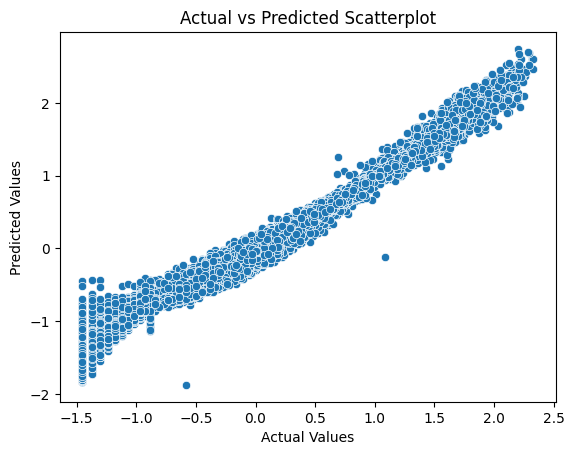

In [23]:
sns.scatterplot(x=y, y=y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Scatterplot')
plt.savefig('Train_Act_vs_pred.png')
plt.show()


In [24]:
import pickle

# Load saved transformers
with open(r'E:\Info_Srping\FWI_Prediction\models\Pkl_files_after_outlier_remover\power_transformers.pkl', 'rb') as f:
    power_transformers = pickle.load(f)

with open(r'E:\Info_Srping\FWI_Prediction\models\Pkl_files_after_outlier_remover\standard_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)


In [25]:
# number of features scaler was trained on
n_features = len(scaler.mean_)  

# index of target column inside scaler
col_index = list(scaler.feature_names_in_).index('fire_weather_index_transformed')

def inverse_single_column(scaler, values, col_index):
    """
    Inverse transform only one column of a StandardScaler.
    values: (n_samples,) array in scaled space for target column
    col_index: index of target column inside scaler.feature_names_in_
    """
    # create dummy matrix with correct number of features
    dummy = np.zeros((len(values), n_features))
    dummy[:, col_index] = values  # put values only in target column
    
    # inverse transform all features
    inv = scaler.inverse_transform(dummy)
    
    # extract only target column (now back in power-transform space)
    return inv[:, col_index]

In [26]:
# Step 1: inverse StandardScaler
y_train_pred_power = inverse_single_column(scaler, y_train_pred, col_index)
y_train_power = inverse_single_column(scaler, y, col_index)

# Step 2: inverse PowerTransformer
pt = power_transformers['fire_weather_index']
y_train_pred_orig = pt.inverse_transform(y_train_pred_power.reshape(-1, 1)).ravel()
y_train_orig = pt.inverse_transform(y_train_power.reshape(-1, 1)).ravel()

# Step 3: evaluate metrics
from sklearn.metrics import r2_score, mean_squared_error

train_r2_orig = r2_score(y_train_orig, y_train_pred_orig)
train_mse_orig = mean_squared_error(y_train_orig, y_train_pred_orig)

print('Original scale R²:', train_r2_orig)
print('Original scale MSE:', train_mse_orig)

Original scale R²: 0.9445584339970283
Original scale MSE: 9.443551431512196


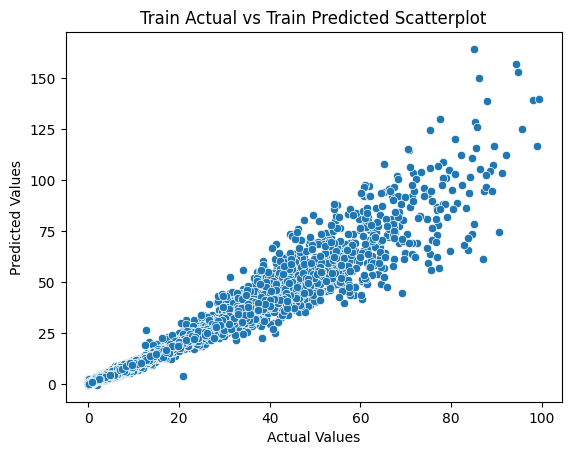

In [27]:
sns.scatterplot(x=y_train_orig, y=y_train_pred_orig)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train Actual vs Train Predicted Scatterplot')
plt.savefig('train_Act_vs_pred.png')
plt.show()


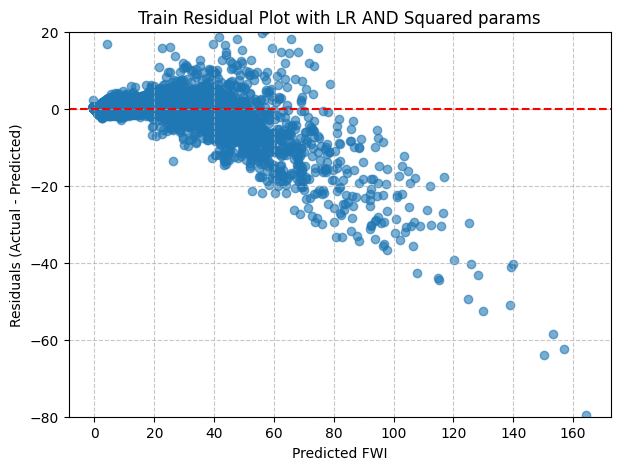

In [35]:
from matplotlib.ticker import MultipleLocator
# Compute residuals
train_residuals = y_train_orig - y_train_pred_orig

# Train residual plot
plt.figure(figsize=(7,5))
plt.scatter(y_train_pred_orig, train_residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted FWI")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Train Residual Plot with LR AND Squared params")
plt.ylim(-80, 20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_locator(MultipleLocator(20))
plt.savefig("Train_Residual_Plot.png")
plt.show()
